# Stage 4
  
     

<p align="center"><img src='https://drive.google.com/uc?export=download&id=1fnhrOpxChyB01EyZ5pNBINkrHUzBYG_9' align="center" /></p><br>

# Intro

안녕하세요~ 여러분!!  😊 

Stage3에서는 모델링의 기초와 성능지표를 배워 성능 평가 및 Submission을 제출해 보았습니다.  

Stage4에서는 Modeling&Ensemble 단계에서 다양한 모델과 <font color="coral">**파라미터**</font>를 활용하여 성능을 향상시켜보겠습니다.  

추가적으로 Data Preprocessing 단계에서 데이터 이해와 성능 향상에 도움을 주는 <font color="green">**EDA**</font>에 대해 배워 볼 예정입니다.  🎉


# 1.  데이터 불러오기

먼저 전처리 된 train/test 파일을 불러와 볼께요!!  
불러온 데이터는 Stage3에서 배운 train/validation/test 형태로 만들어 줄께요.

In [1]:
# pandas 불러오기
import pandas as pd

#train, test, submission 데이터 불러오기
train = pd.read_csv('train_pre.csv')
test = pd.read_csv('test_pre.csv')
submission = pd.read_csv('sample_submission.csv')

In [2]:
# data, target 만들기

data = train.iloc[:,:-1]
target = train['credit']

In [3]:
# train, validation 만들기

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3)

사용할 데이터의 shape을 확인해 볼께요.

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(test.shape)

(18519, 18)
(18519,)
(7938, 18)
(7938,)
(10000, 18)


# 2. 다양한 모델

데이터 분석은 같은 문제라도 다양한 모델을 활용하여 해결할 수 있습니다.  

**주어진 데이터, 해결해야 하는 문제, 성능**에 따라 최적의 모델을 선정하여 문제를 해결합니다.  

해당 문제는 Target 값이 0,1,2로 되어있으므로, 분류 모델을 사용합니다.  

이번 시간에는 분류 문제에서 사용되는 다양한 모델과 예시를 한번 보겠습니다.

---

분류 모델에는 다음과 같은 모델들이 존재 합니다.  

> - Linear 모델
> - Tree 모델
> - Boosting 모델
  
해당 모델들에 대한 종류와 예시를 한번 살펴보겠습니다.

### 2.1 Linear 모델

<p align="center"><img src='https://miro.medium.com/max/1400/1*44qV8LhNzE5hPnta2PaaHw.png' width="500" height ="500" align="center" /></p><br>
<p style='text-align: right;'> 출처 : miro.medium </p>

Linear 기반 모델의 대표적인 모델은 **LogisticRegression** 모델이 있습니다.  
**LogisticRegression** 모델은 회귀 모델이지만 이진 분류에서 자주 사용되는 Linear 모델입니다.  
선형으로 된 모델을 Logistic 함수에 넣어 output을 생성합니다.

In [5]:
# LinearReegression 예시

# LinearRegression Import
from sklearn.linear_model import LogisticRegression

# Train
lr_model = LogisticRegression() # 모델 지정
lr_model.fit(X_train,y_train) # 모델 학습

LogisticRegression()

In [6]:
# evaluation

from sklearn.metrics import accuracy_score, log_loss

val_pred = lr_model.predict(X_valid) # validation 예측
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = lr_model.predict_proba(X_valid) # validation 확률 예측
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6379440665154951
log_loss :  0.8824192876595736


> accuracy score 같은 경우에는 predict를, Logloss 같은 경우에는 predict_proba를 활용하여 모델 성능을 평가합니다.

In [7]:
# Predict

test_pred = lr_model.predict_proba(test) # test 예측
submission.iloc[:,1:] = test_pred # DataFrame 생성
submission

,index,0,1,2
0,26457,0.087498,0.176297,0.736204
1,26458,0.130702,0.219923,0.649375
2,26459,0.104584,0.205436,0.689979
3,26460,0.113885,0.199303,0.686812
4,26461,0.163703,0.265294,0.571003
...,...,...,...,...
9995,36452,0.118075,0.217639,0.664286
9996,36453,0.149447,0.201125,0.649428
9997,36454,0.077167,0.164629,0.758204
9998,36455,0.133855,0.191683,0.674462


In [ ]:
# Submission 생성
submission.to_csv('submission_LogisticRegression.csv')

### 2.2 Tree 모델

<p align="center"><img src='https://hleecaster.com/wp-content/uploads/2020/01/dct01.png' width="800" height ="500" align="center" /></p><br>
<p style='text-align: right;'> 출처 : 아무튼 워라밸 </p>

Tree기반의 대표적인 모델로는 **DecisionTree Model**이 있습니다.  
이외에도 **RandomForest, Extratree Model**이 존재합니다.  
**RandomForest**는 DecisionTree를 여러개 합쳐놓은 모델입니다.  
RandomForest에서는 **Bagging** 방법을 사용하는데 이는 **Stage6**에서 더 자세히 설명하겠습니다~  
**Extratree**는 RandomForest를 여러개 합쳐놓은 Tree기반 모델입니다.  
Stage3에서 DecisionTree Model로 진행했기에 Stage4에서도 **DecisionTree Model**을 예시로 들어보겠습니다.  

In [9]:
# DecisionTreeClassifier 예시

# DecisionTreeClassifier Import
from sklearn.tree import DecisionTreeClassifier

# Train
dt_model = DecisionTreeClassifier() # 모델 지정
dt_model.fit(X_train,y_train) # 모델 학습

DecisionTreeClassifier()

In [10]:
# evaluation

from sklearn.metrics import accuracy_score, log_loss

val_pred = dt_model.predict(X_valid) # validation 예측
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = dt_model.predict_proba(X_valid) # validation 확률 예측
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.5006298815822625
log_loss :  17.247632858330306


In [11]:
# Predict

test_pred = dt_model.predict_proba(test) # test 예측
submission.iloc[:,1:] = test_pred # DataFrame 생성
submission

,index,0,1,2
0,26457,0.0,0.0,1.0
1,26458,0.0,0.0,1.0
2,26459,0.0,0.0,1.0
3,26460,0.0,0.0,1.0
4,26461,0.0,0.0,1.0
...,...,...,...,...
9995,36452,0.0,0.0,1.0
9996,36453,0.0,1.0,0.0
9997,36454,0.0,0.0,1.0
9998,36455,0.0,0.0,1.0


In [ ]:
# Submission 생성
submission.to_csv('submission_DecisionTreeClassifier.csv')

### 2.3 Boosting 모델

Boosting기반의 대표적인 모델로는 **GBM**모델이 있습니다.  
그이외에도 XGB,LGBM,Catboost 등 다양한 모델이 존재합니다.  
XGB, LGBM, CatBoost 모델 같은 경우에는 별도의 모델 설치가 필요합니다.    
Boosting에 대해서는 **Stage6**에서 자세하게 설명할 예정입니다~

In [12]:
# GradientBoostingClassifier 예시

# GradientBoostingClassifier Import
from sklearn.ensemble import GradientBoostingClassifier

# Train
gbm_model = GradientBoostingClassifier() # 모델 지정
gbm_model.fit(X_train,y_train) # 모델 학습

GradientBoostingClassifier()

In [13]:
# evaluation

from sklearn.metrics import accuracy_score, log_loss

val_pred = gbm_model.predict(X_valid) # validation 예측
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = gbm_model.predict_proba(X_valid) # validation 확률 예측
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.63567649281935
log_loss :  0.8682403823172201


In [14]:
# Predict

test_pred = gbm_model.predict_proba(test) # test 예측
submission.iloc[:,1:] = test_pred # DataFrame 생성
submission

,index,0,1,2
0,26457,0.083172,0.233319,0.683509
1,26458,0.034971,0.148685,0.816344
2,26459,0.113165,0.482460,0.404375
3,26460,0.147531,0.335902,0.516567
4,26461,0.153932,0.538616,0.307452
...,...,...,...,...
9995,36452,0.094491,0.505645,0.399864
9996,36453,0.109339,0.520148,0.370513
9997,36454,0.033107,0.124740,0.842153
9998,36455,0.054833,0.166225,0.778942


In [ ]:
# Submission 생성
submission.to_csv('submission_GradientBoostingClassifier.csv')

### Inst.

- RandomForest 모델을 활용하여 evaluation&Submission을 만들어 보세요.
- evaluation 점수를 확인하세요.
- 대회에 Submission을 제출해 보세요.

In [ ]:
# 모델 Import

# Train


In [ ]:
# evaluation


In [ ]:
# Predict


In [ ]:
# Submission 생성


### Hint.

- Tab을 활용하면 해당 게열의 모델을 확인 할 수 있어요.
- 모델 Import와 변수명만 바꾸면 쉽게 진행 할 수 있어요.

### Solution.

In [15]:
# RandomForestClassifier 예시

# RandomForestClassifier Import
from sklearn.ensemble import RandomForestClassifier

# Train
rf_model = RandomForestClassifier() # 모델 지정
rf_model.fit(X_train,y_train) # 모델 학습

RandomForestClassifier()

In [16]:
# evaluation

from sklearn.metrics import accuracy_score, log_loss

val_pred = rf_model.predict(X_valid) # validation 예측
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = rf_model.predict_proba(X_valid) # validation 확률 예측
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6162761400856639
log_loss :  1.0529320600122476


In [17]:
# Predict

test_pred = rf_model.predict_proba(test) # test 예측
submission.iloc[:,1:] = test_pred # DataFrame 생성
submission

,index,0,1,2
0,26457,0.18,0.26,0.56
1,26458,0.11,0.24,0.65
2,26459,0.08,0.25,0.67
3,26460,0.14,0.24,0.62
4,26461,0.18,0.33,0.49
...,...,...,...,...
9995,36452,0.11,0.36,0.53
9996,36453,0.19,0.49,0.32
9997,36454,0.11,0.24,0.65
9998,36455,0.11,0.33,0.56


In [ ]:
# Submission 생성
submission.to_csv('submission_RandomForestClassifier.csv')

# 3. Hyperparameter Tuning

앞선 내용을 통해 다양한 모델에 대해 알아보았다면, 이번에는 모델의 구성에 대해 알아보겠습니다.  

**Hyperparameter**란 엔지니어가 직접 설정해 주어야 하는 변수값으로, 값을 어떻게 설정하느냐에 따라 모델의 성능을 개선시킬 수도, 저하시킬 수도 있습니다.  

같은 모델이라도 모델을 구성하고 있는 **Hyperparameter**에 따라 모델 성능이 많이 달라질 수 있습니다.  

### 3.1 Hyperparameter

먼저, 2.2에서 사용한 **DecisionTree**의 대표적인 **Hyperparameter** 몇 개만 알아보겠습니다.  
다른 모델의 Hyperparameter가 궁금하면 구글링을 통해 알아보세요~

---
DecisionTree의 대표적인 **Hyperparameter**는
  

> - max_depth : 트리의 최대 깊이
> - min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수
> - min_samples_split : 노드를 분할하기 위해 최소한의 샘플 데이터 수


이외에도 다양한 Hyperparameter가 존재합니다.

---

그러면 3개의 Hyperparameter를 가지고 2.2 모델을 돌려보겠습니다.  
Hyperparameter를 다음과 같이 설정하면

> - max_depth : 10
> - min_samples_leaf : 5
> - min_samples_split : 5

In [18]:
# DecisionTreeClassifier 예시

# DecisionTreeClassifier Import
from sklearn.tree import DecisionTreeClassifier

# Train
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5) # 모델 지정 + Hyperparameter 설정
dt_model.fit(X_train,y_train) # 모델 학습

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)

In [19]:
# evaluation

from sklearn.metrics import accuracy_score, log_loss

val_pred = dt_model.predict(X_valid) # validation 예측
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = dt_model.predict_proba(X_valid) # validation 확률 예측
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6201814058956916
log_loss :  1.7549330560700716


> 2.2에서 만든 DecisionTree 모델과 accuracy_score와 log_loss 점수가 바뀐 것을 확인할 수 있습니다.

In [20]:
# Predict

test_pred = dt_model.predict_proba(test) # test 예측
submission.iloc[:,1:] = test_pred # DataFrame 생성
submission

,index,0,1,2
0,26457,0.142857,0.714286,0.142857
1,26458,0.000000,0.222222,0.777778
2,26459,0.000000,0.222222,0.777778
3,26460,0.142857,0.714286,0.142857
4,26461,0.134328,0.268657,0.597015
...,...,...,...,...
9995,36452,0.142857,0.714286,0.142857
9996,36453,0.111111,0.333333,0.555556
9997,36454,0.000000,0.222222,0.777778
9998,36455,0.142857,0.714286,0.142857


In [ ]:
# Submission 생성
submission.to_csv('submission_DecisionTreeClassifier_tuning.csv')

### 3.2 RandomSearch VS GridSearch

3.1에서 확인한 것처럼 Hyperparameter에 따라 모델의 성능을 결정된다는 것을 알 수 있습니다.  
문제를 해결하기 위해서는 데이터와 문제에 맞는 Hyperparameter를 설정 할 필요가 있습니다.  
그러나 **Hyperparameter를 사람이 일일히 설정 할 수 없으니** 최적의 Hyperparameter 찾아주는 <font color="green">**RandomSearch**</font>와 <font color="coral">**GridSearch**</font>에 대해 알아보겠습니다.


---

<p align="center"><img src='https://velog.velcdn.com/images%2Fcrosstar1228%2Fpost%2F86ed2303-4861-4f30-8738-1ada436b4e32%2Fimage.png' width="800" height ="500" align="center" /></p><br>
<p style='text-align: right;'> 출처 : 데이터리안 </p>

**GridSearch란**
> - 간단하고 광범위하게 사용되는 hyperparameter 탐색 알고리즘입니다
> - 해당 범위 및 Step의 모든 경우의 수를 탐색한다
> - 범위를 넓게 가져갈수록, Step을 작게 설정할 수록 최적해를 찾을 가능성이 높이지지만 시간이 오래 걸립니다
> - 일반적으로 넓은 범위와 큰 Step으로 설정한 후 범위를 좁혀 나가는 방식을 사용하여 시간을 단축한다
>> **parameters**
>> - estimator : 측정에 이용되는 model
>> - param_grid : gridsearch에 사용되는 search space
>> - scoring : 성능 측정 metric. 'accuracy', 'roc_auc', 'r2', 'neg_mean_squared_error' 등
>> - n_jobs : gridsearch 시, multicore processor일 경우 병렬처리할 횟수
>> - cv : cross-validation 시 fold 수
---

**RandomSearch란**
> - 정해진 범위 내에서 Random하게 선택합니다
> - 기본적으로는 더 빠르고 효율적이기 때문에 GridSearch보다 권장되는 방법이다
> - Grid Serach보다 속도가 빠르지만 optimzed solution이 아닐 수 있습니다
> - Sample의 수가 많다면 Random Sampling을 통해 최적해를 찾을 가능성이 높아진다
>>**parameters**
>> - gridsearch와 겹치는 paramter 생략
>> - n_iter : random하게 골라지는 hyperpareter 조합의 수를 특정
>> - random_state : random 변수 생성 시 seed 값

---

3.1에서 진행한 DecisionTree에 **GridSearch**를 이용해보겠습니다.

In [5]:
# GridSearchCV 예시

# GridSearchCV Import
from sklearn.model_selection import GridSearchCV

# parameter setting

params ={
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,12,18]
}

In [11]:
# DecisionTreeClassifier Import
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, make_scorer


# GridSearchCV 진행
dt_clf = DecisionTreeClassifier()

# GridSearchCV에서 Logloss가 작동하지 않아서 설정
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=2,n_jobs=1,scoring=LogLoss)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 12, 18]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [13]:
# GridSearchCV 결과 확인
print('최적 hyperpareter :\n ',grid_cv.best_params_) # Best hyperpareter 확인
print(f'최고 logloss score ',-round(grid_cv.best_score_,4)) # Best Score 확인

최적 hyperpareter :
  {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 12}
최고 logloss score  0.926


> 최적의 Parameter를 가지고 새로운 DecisionTree를 만들어 보겠습니다

In [24]:
# Train
dt_model = DecisionTreeClassifier( max_depth=12, min_samples_leaf=18, min_samples_split=18) # 모델 지정 + Hyperparameter 설정
dt_model.fit(X_train,y_train) # 모델 학습

DecisionTreeClassifier(max_depth=12, min_samples_leaf=18, min_samples_split=18)

In [25]:
# evaluation

from sklearn.metrics import accuracy_score, log_loss

val_pred = dt_model.predict(X_valid) # validation 예측
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = dt_model.predict_proba(X_valid) # validation 확률 예측
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.618291761148904
log_loss :  1.2278119782789445


> 3.1에서 만든 DecisionTree 모델과 accuracy_score와 log_loss 점수가 바뀐 것을 확인할 수 있습니다.

In [26]:
# Predict

test_pred = dt_model.predict_proba(test) # test 예측
submission.iloc[:,1:] = test_pred # DataFrame 생성
submission

,index,0,1,2
0,26457,0.047619,0.476190,0.476190
1,26458,0.047619,0.476190,0.476190
2,26459,0.047619,0.476190,0.476190
3,26460,0.047619,0.476190,0.476190
4,26461,0.080000,0.320000,0.600000
...,...,...,...,...
9995,36452,0.047619,0.476190,0.476190
9996,36453,0.111111,0.222222,0.666667
9997,36454,0.047619,0.476190,0.476190
9998,36455,0.047619,0.476190,0.476190


In [ ]:
# Submission 생성
submission.to_csv('submission_DecisionTreeClassifier_tunning.csv')

### Inst.

- 2.5에서 사용한 모델을 가지고 RandomSearch를 진행하세요.
- GridSearch에 없는 파라미터를 사용하세요
- evaluation 점수를 확인하세요.
- 대회에 Submission을 제출해 보세요.

In [ ]:
# 모델 Import

# Train


In [ ]:
# evaluation


In [ ]:
# Predict


In [ ]:
# Submission 생성


### Hint.

- RandomizedSearchCV를 Import 해보세요.

### Solution.

In [29]:
# GridSearchCV 예시

# GridSearchCV Import
from sklearn.model_selection import RandomizedSearchCV

# parameter setting

params ={
    'n_estimators' : range(10,50),
    'max_depth' : (6,18),
    'min_samples_leaf' : (8,18),
    'min_samples_split' : (8,18)
}

In [30]:
# RandomForestClassifier Import
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV 진행
rf_clf = RandomForestClassifier()
grid_cv = RandomizedSearchCV(rf_clf, param_distributions=params, cv=2,n_jobs=1)
grid_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': (6, 18),
                                        'min_samples_leaf': (8, 18),
                                        'min_samples_split': (8, 18),
                                        'n_estimators': range(10, 50)})

In [31]:
# GridSearchCV 결과 확인
print('최적 hyperpareter :\n ',grid_cv.best_params_) # Best hyperpareter 확인
print(f'최고 accuracy score ',round(grid_cv.best_score_,4)) # Best Score 확인

최적 hyperpareter :
  {'n_estimators': 27, 'min_samples_split': 8, 'min_samples_leaf': 18, 'max_depth': 6}
최고 accuracy score  0.6429


> 최적의 Parameter를 가지고 새로운 RandomForest를 만들어 보겠습니다

In [32]:
# Train
rf_model = RandomForestClassifier(n_estimators=10, max_depth=12, min_samples_leaf=18, min_samples_split=18) # 모델 지정 + Hyperparameter 설정
rf_model.fit(X_train,y_train) # 모델 학습

RandomForestClassifier(max_depth=12, min_samples_leaf=18, min_samples_split=18,
                       n_estimators=10)

In [33]:
# evaluation

from sklearn.metrics import accuracy_score, log_loss

val_pred = rf_model.predict(X_valid) # validation 예측
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = rf_model.predict_proba(X_valid) # validation 확률 예측
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6388259007306626
log_loss :  0.8637965105943957


> 3.1에서 만든 RandomForest 모델과 accuracy_score와 log_loss 점수가 바뀐 것을 확인할 수 있습니다.

In [34]:
# Predict

test_pred = rf_model.predict_proba(test) # test 예측
submission.iloc[:,1:] = test_pred # DataFrame 생성
submission

,index,0,1,2
0,26457,0.103873,0.240535,0.655592
1,26458,0.136408,0.266931,0.596661
2,26459,0.106960,0.271898,0.621142
3,26460,0.128726,0.212287,0.658987
4,26461,0.117285,0.407585,0.475130
...,...,...,...,...
9995,36452,0.100494,0.255036,0.644470
9996,36453,0.044455,0.387659,0.567886
9997,36454,0.093706,0.204180,0.702114
9998,36455,0.093758,0.286040,0.620203


In [ ]:
# Submission 생성
submission.to_csv('submission_RandomForestClassifier_tunning.csv')

# 4. EDA

EDA는 수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정으로, 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정을 말합니다.  

EDA를 진행하는 이유는 크게 2가지를 들수 있습니다.


> 1. 데이터의 분포 및 값을 검토함으로써 데이터가 표현하는 현상을 더 잘 이해하고, 데이터에 대한 잠재적인 문제를 발견할 수 있습니다.   
이를 통해, 본격적인 분석에 들어가기에 앞서 데이터의 수집을 결정할 수 있습니다.


> 2. 다양한 각도에서 살펴보는 과정을 통해 문제 정의 단계에서 미쳐 발생하지 못했을 다양한 패턴을 발견하고, 이를 바탕으로 기존의 가설을 수정하거나 새로운 가설을 세울 수 있습니다.

지금부터는 데이터를 가지고 4개의 EDA를 진행해 보겠습니다!!  
EDA는 여러 방법과 관점에서 정말 다양하게 결과가 도출되므로 많이 경험해 보시는 걸 추천합니다. 😘😘

먼저 EDA를 시작하기 전에 데이터를 다시 불러와주겠습니다.

In [42]:
# pandas 불러오기
import pandas as pd

#train 데이터 불러오기
df = pd.read_csv('train.csv')

In [43]:
# 시각화에서 가장 많이 쓰는 두가지 패키지
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib에서는 한글이 출력되지 않아 아래의 코드를 실행해주어야 합니다.

In [44]:
# matplotlib 한글 폰트 출력코드
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

### 4.1 Pie Chart

첫번째도 해볼 Chart는 **Pie Chart**입니다.  
Pie Chart는 둥근란 형태로 데이터를 시각화해줍니다.  
주로 `퍼센트`, `비율`과 같은 데이터를 표현할 때 사용합니다.  
성별을 가지고 Pie Chart를 만들어 봅시다.

In [45]:
df1= df.groupby('gender').count()['index'] # grouby 함수를 사용하여 데이터 생성
df1

gender
F    17697
M     8760
Name: index, dtype: int64

> 여자가 17697명 남자가 8760명인 것을 알 수 있습니다.   
> 이것을 Pie Chart로 시각화 해볼까요?

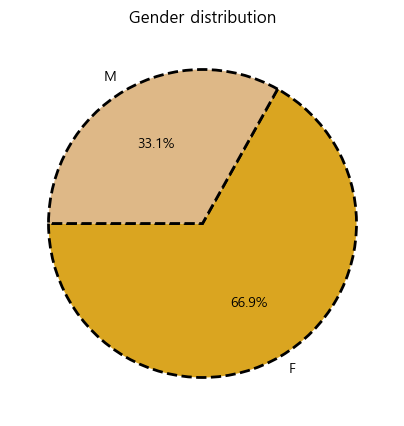

In [46]:
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') # 배경색 설정

plt.pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,autopct='%1.1f%%',wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
# plt.pie(데이터 , 라벨, 색갈, 시작 각도, 소수점,디자인)

plt.title('Gender distribution') # Chart 제목
plt.show()

### 4.2 Hist

두번째로 해볼 Chart는 **Hist Chart**입니다.  
Hist Chart는 히스토그램을 표현하는 Chart로 주로 연속된 수를 범주로 나누어 보여줍니다.  
나이를 가지고 Hist Chart를 만들어보겠습니다.  

In [47]:
# DAYS_BIRTH 변환 작업
import numpy as np
df['new_age'] = round(abs(df['DAYS_BIRTH'])/365.5,0).astype(np.int32)
df.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,38
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,31


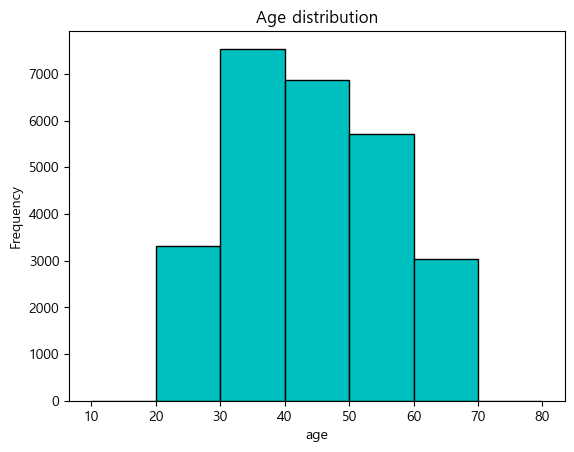

In [48]:
df['new_age'].plot.hist(bins=range(10,81,10),color='c', edgecolor='k')
# 데이터.plot.hist(bins=range(시작 값, 끝 값, 나누는 값),컬러, 엣지 컬러)

plt.xlabel('age') # X축 설정
plt.title('Age distribution') # Chart 제목
plt.show()

### 4.3 Bar Chart

세번쨰로 해볼 Chart는 **Bar Chart**입니다.  
Bar Chart는 갯수, 수량 등 값을 비교하기 좋은 그래프입니다.  
Bar Chart를 가지고 교육 수준을 파악해 보겠습니다.  

In [49]:
et = df.groupby('edu_type').count()['index']
et = et.reset_index()
et

,edu_type,index
0,Academic degree,23
1,Higher education,7162
2,Incomplete higher,1020
3,Lower secondary,257
4,Secondary / secondary special,17995


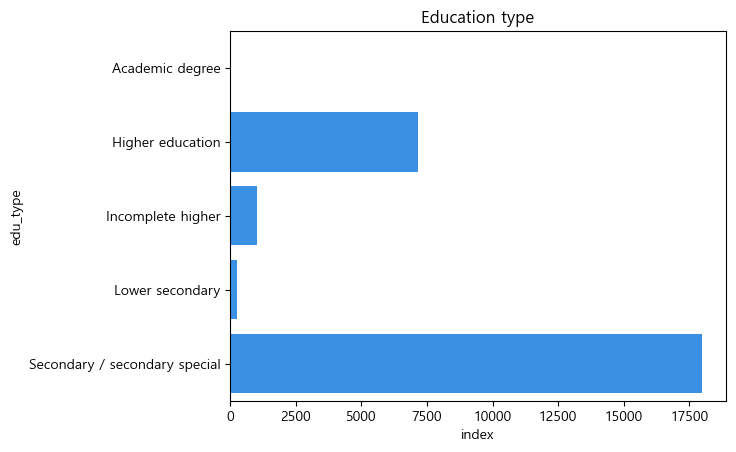

In [50]:
sns.barplot(data=et, y="edu_type", x="index", orient='h',color='dodgerblue')
#sns.barplot(데이터, y값, x값, 방향, 컬러)

title_color = 'black' # 제목 색갈
plt.title('Education type',color=title_color) # 제목
plt.show()

### 4.4 Box Plot

네번째로 볼 Chart는 Box plot입니다.  
Box Plot은 데이터의 분포와 이상치를 볼 때 많이 사용합니다.  
Box Plot을 활용하여 연간 소득을 파악해보겠습니다.  

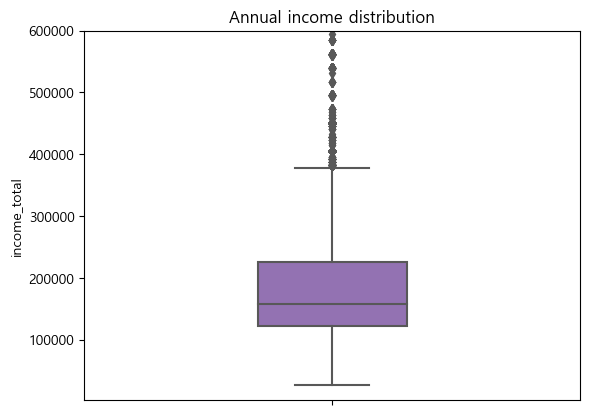

In [51]:
sns.boxplot(data=df,y="income_total", width=0.3, color='tab:purple')
#sns.boxplot(데이터,y값, 넓이, 컬러)

plt.title('Annual income distribution') # 제목
plt.ylim(2000, 600000) # y값 범위
plt.show()

### 4.5 Heatmap

수치형 데이터 간의 상관관계를 알아보는 Heatmap을 그려보겠습니다.  
먼저 수치형 데이터 3개만 추출하겠습니다.

In [52]:
df2 = df[['new_age','income_total','child_num']]

In [53]:
corr = df2.corr() # 3개의 수치형 데이터에 대한 상관관계 계산

<AxesSubplot:>

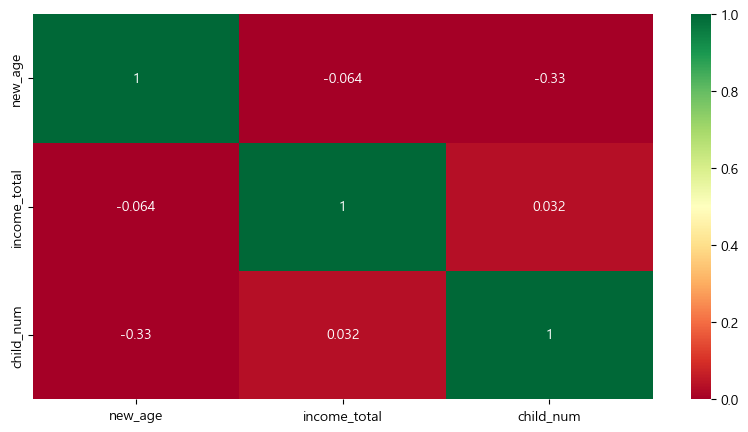

In [54]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 
#sns.heatmap(데이터, 디자인, 상관관계 표시,최솟값, 최댓값) 

- 상관관계는 1이 될수록 높은 상관관계를 0에 가까울 수록 낮은 상관관계를 가집니다.  
- +는 양의 상관관계를 -는 음의 상관관계를 가집니다.  
- 해당 heatMap을 보니 3개의 특성들은 낮은 상관관계를 가짐을 알 수 있습니다. 

- 이외에도 LinePlot, KdePlot 등 많은 시각화 방법들이 있으니, 데이터에 맞게 EDA를 진행하면 문제를 해결하는데 많은 도움이 될것 입니다.

### Inst.

- 앞서 배운 5개의 EDA를 진행하세요.
- 추가적으로 배우지 않은 Chart 1개를 만들어 보세요.

In [55]:
# EDA


### Hint.
- Line,Kde Plot을 진행해 보세요.

### Solution.

In [56]:
df['new_begin_month'] = [0 if s >=0 else round(abs(s)/12,2) for s in df['begin_month']]

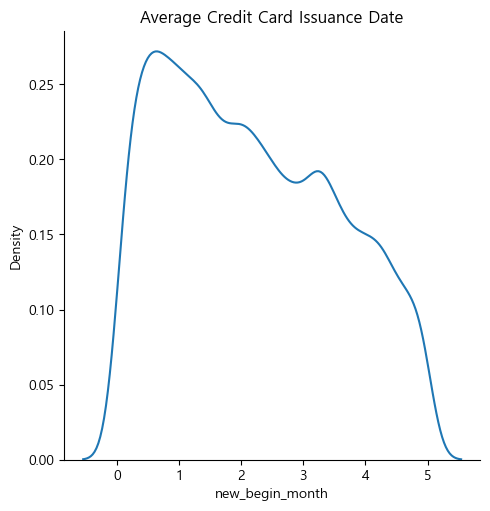

In [57]:
sns.displot(data=df,x='new_begin_month',kind='kde')
title_color = 'black'
plt.title('Average Credit Card Issuance Date',color=title_color)
plt.show()

## Outro

오늘 많은 것을 배웠는데, 자주 사용하고 많이 사용하다보면 익숙해질 날이 올거에요~  

중요한 부분이니까 많이 찾아보고, 실습 과제를 다하면 실력이 팍팍오를거에요!!  

다음 시간에는 EDA를 활용하는 방법에 대해 배울 예정입니다.  

모두들 안녕~~ 👍